In [603]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
import numpy as np

# Set graph styles

In [525]:
plt.style.use('Solarize_Light2')
# # plt.style.use('seaborn-poster')
# plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Merriweather'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
# plt.rcParams['xtick.color']='black'
# plt.rcParams['ytick.color']='black'
# plt.rcdefaults()

# Import, sift and clean data 

In [110]:
df = pd.read_csv('homicide-data.csv', encoding = "latin1")

In [111]:
df_philly = df[df.city == 'Philadelphia']

In [118]:
df_philly = df_philly[df_philly.victim_race!='Other']

# Quick analysis

In [624]:
closed = df_philly[df_philly.disposition == 'Closed by arrest'].uid.count()
no_arrest = df_philly[df_philly.disposition != 'Closed by arrest'].uid.count()
total = df_philly.uid.count()
without_arrest = no_arrest/total * 100
close_rate = closed/total * 100
print('Philadelphia has had around {} murders from 2007-2016.'.format(total))
print('Philly P.D. closed {}% of those cases, while {}% of them resulted in no arrest'.format(round(close_rate), round(without_arrest)))

Philadelphia has had around 3035 murders from 2007-2016.
Philly P.D. closed 55.0% of those cases, while 45.0% of them resulted in no arrest


# Graphs! 

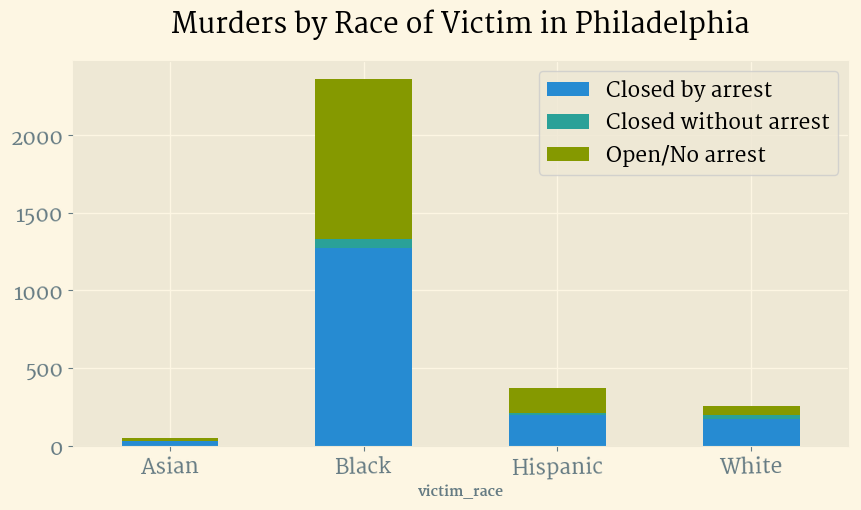

In [593]:
race = df_philly.groupby('victim_race')['disposition'].value_counts().unstack().reset_index().fillna(0)
ax_race = race.plot(kind='bar', x='victim_race', stacked=True,figsize=(10,5))
ax_race.yaxis.label.set_visible(False)
ax_race.set_title("Murders by Race of Victim in Philadelphia", pad = 20)
ax_race.title.set_fontsize(20)
ax_race.legend(fontsize =15)
ax_race.tick_params(labelrotation=1)

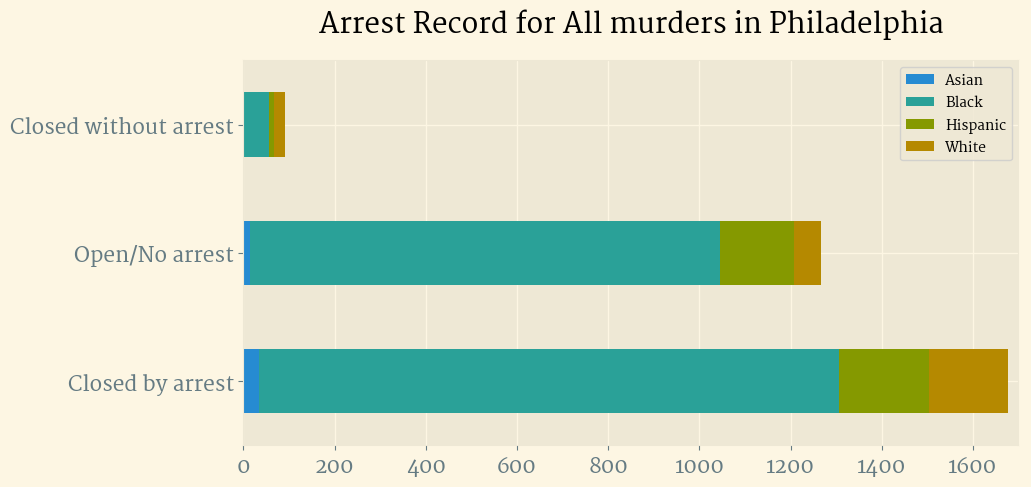

In [579]:
dispo = df_philly.groupby('disposition')['victim_race'].value_counts().unstack().reset_index().fillna(0)
dispo = dispo.sort_values(by='Black', ascending=False)
ax_dispo= dispo.plot(kind='barh', x='disposition', stacked=True, figsize=(10,5))
ax_dispo.yaxis.label.set_visible(False)
ax_dispo.set_xlim(0,1700)
ax_dispo.set_title("Arrest Record for All murders in Philadelphia", pad = 20)
ax_dispo.title.set_fontsize(20)
ax_dispo.legend(fontsize =10)

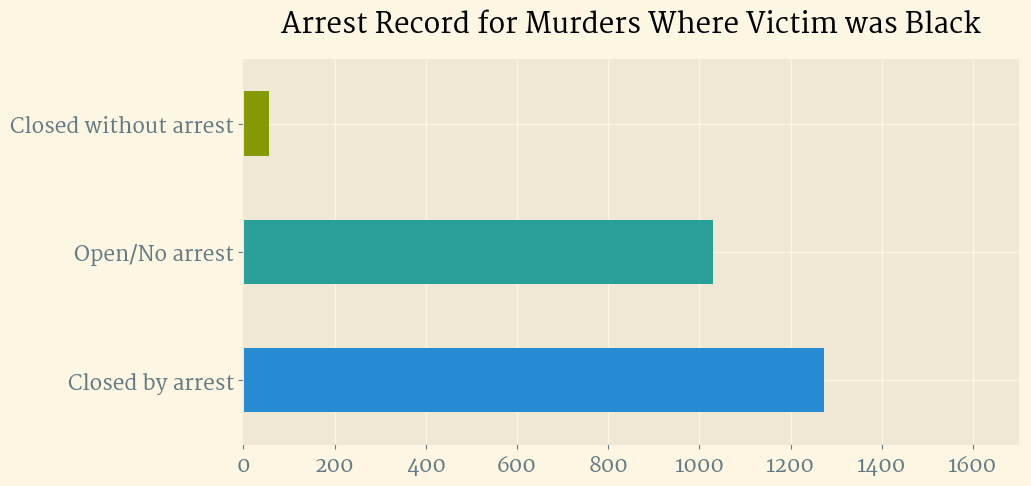

In [595]:
ax_black = df_philly[df_philly.victim_race == "Black"].disposition.value_counts().plot(kind='barh', figsize=(10,5))
ax_black.set_xlim(0,1700)
ax_black.set_title("Arrest Record for Murders Where Victim was Black", pad = 20)
ax_black.title.set_fontsize(20)

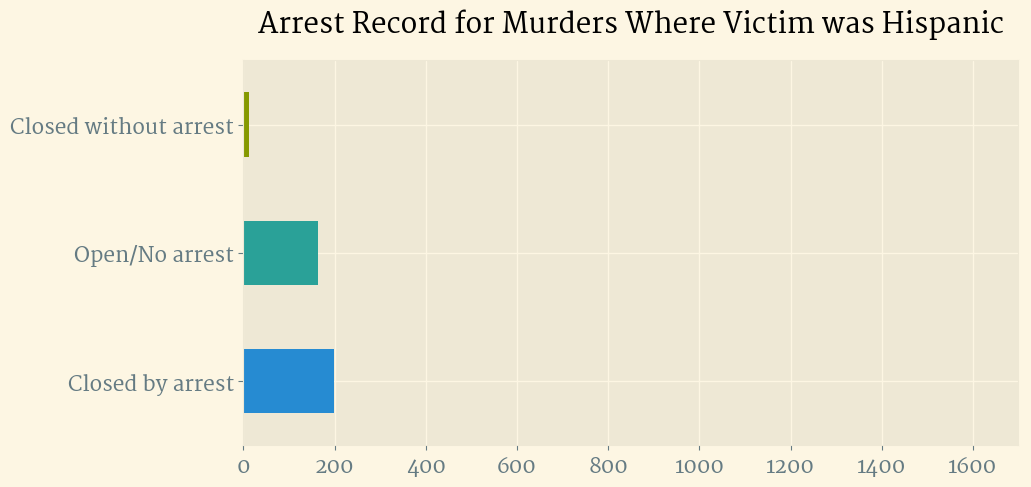

In [596]:
ax_hisp = df_philly[df_philly.victim_race == "Hispanic"].disposition.value_counts().plot(kind='barh', figsize=(10,5))
ax_hisp.set_xlim(0,1700)
ax_hisp.set_title("Arrest Record for Murders Where Victim was Hispanic", pad = 20)
ax_hisp.title.set_fontsize(20)

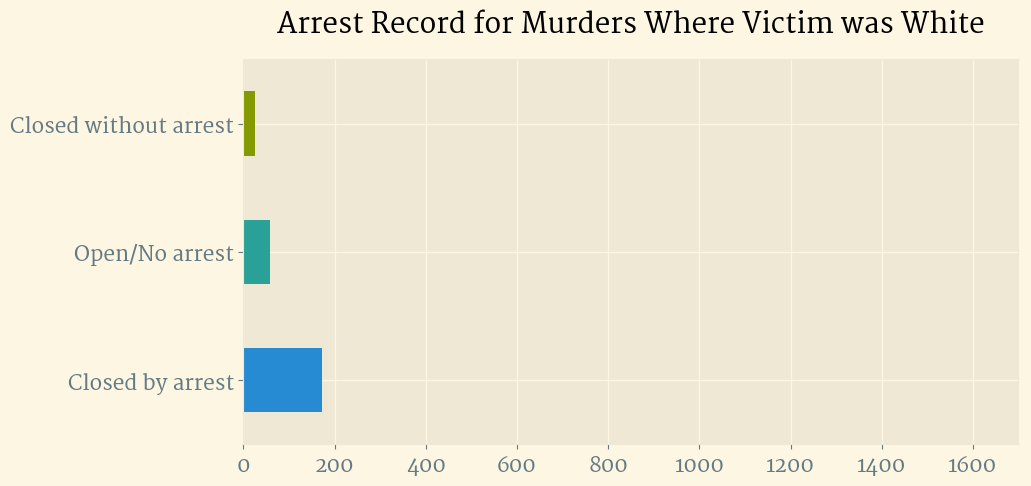

In [597]:
ax_white = df_philly[df_philly.victim_race == "White"].disposition.value_counts().plot(kind='barh', figsize=(10,5))
ax_white.set_xlim(0,1700)
ax_white.set_title("Arrest Record for Murders Where Victim was White", pad = 20)
ax_white.title.set_fontsize(20)

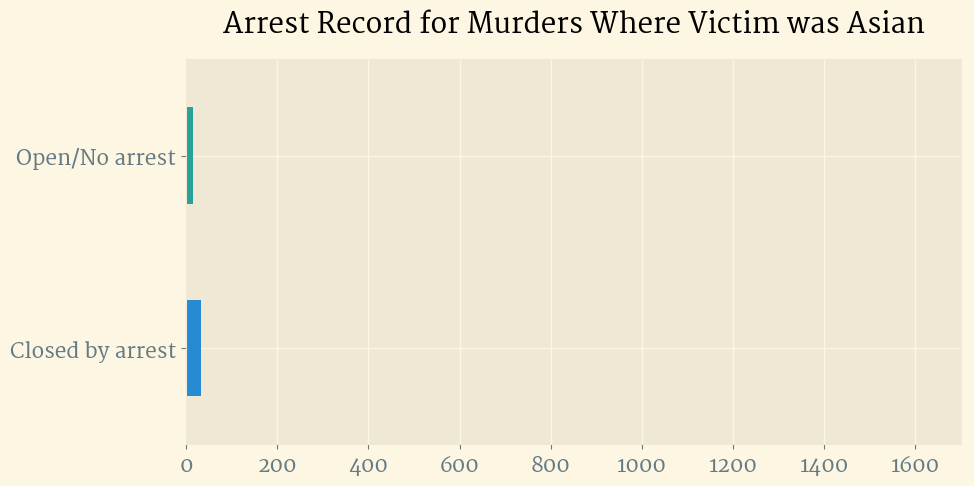

In [602]:
ax_asian = df_philly[df_philly.victim_race == "Asian"].disposition.value_counts().plot(kind='barh', figsize=(10,5))
ax_asian.set_xlim(0,1700)
ax_asian.set_title("Arrest Record for Murders Where Victim was Asian", pad = 20)
ax_asian.title.set_fontsize(20)
ax_asian.text()

In [599]:
df_philly.year.max()

2016

In [600]:
df_philly['year']=df_philly.reported_date.astype(str)

In [426]:
df_philly['year']=df_philly.year.str.extract('(\d\d\d\d)').astype(int)

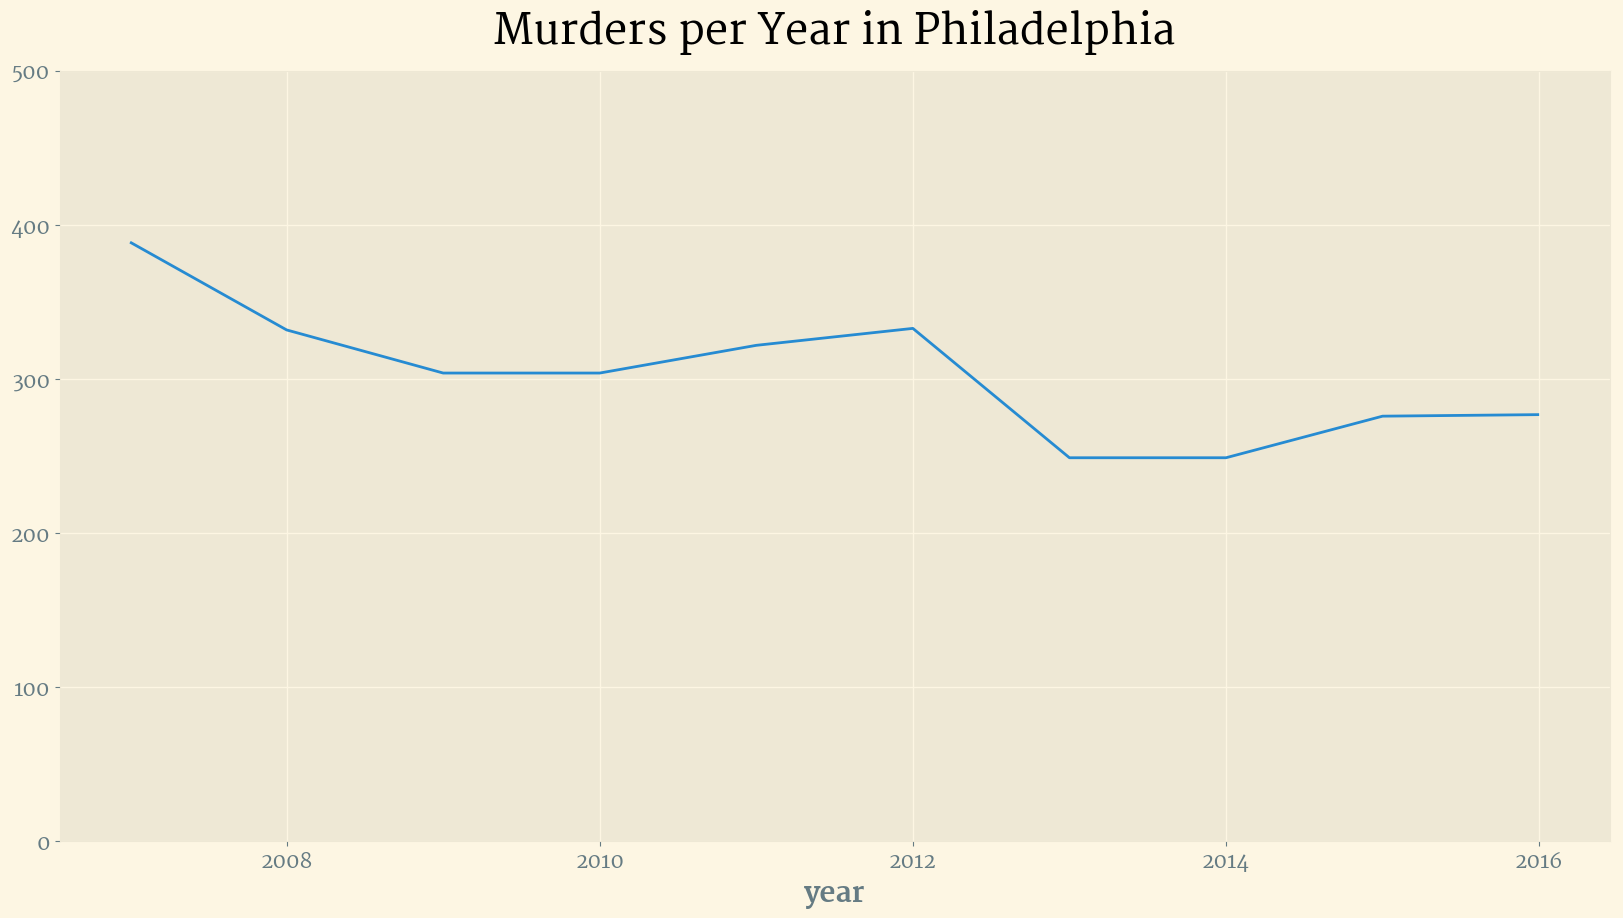

In [527]:
ax_year = df_philly.sort_values(by='year').groupby('year')['uid'].count().plot(ylim=(0,500), figsize=(20,10))
ax_year.set_title("Murders per Year in Philadelphia", pad = 20)
ax_year.title.set_fontsize(30)
ax_year.xaxis.label.set_fontsize(20)

# Definitely _Not_ a Map

Just a scatterplot of coordinates that looks surprisingly like Philadelphia 

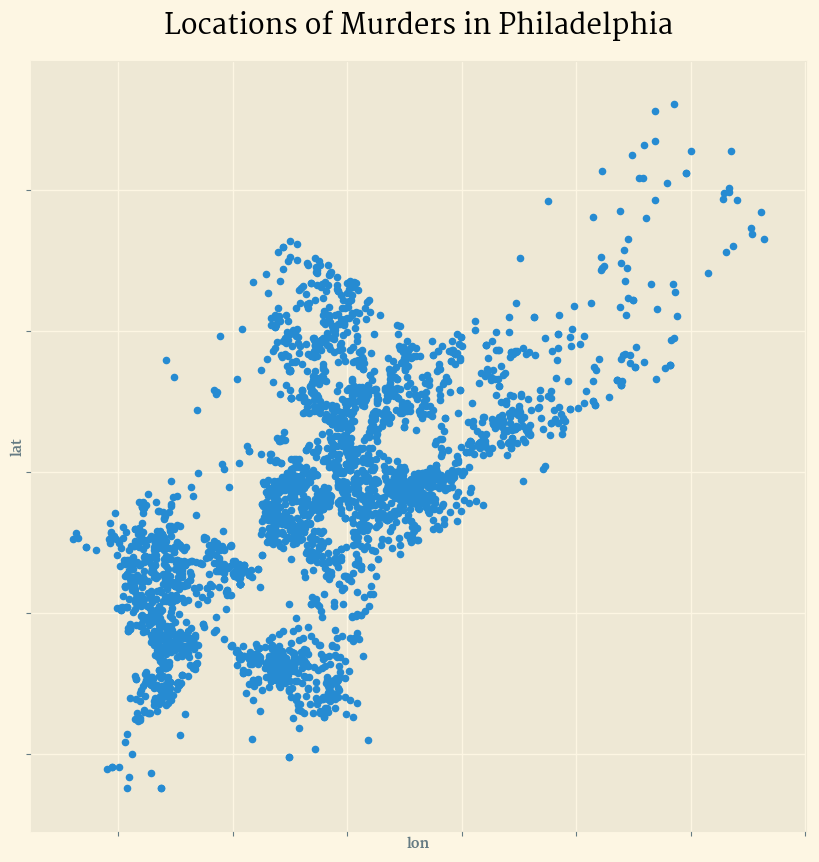

In [528]:
ax_loc = df_philly.plot.scatter(x='lon', y = 'lat', figsize =(10,10))
ax_loc.set_title("Locations of Murders in Philadelphia", pad = 20)
ax_loc.title.set_fontsize(20)
ax_loc.tick_params(labelbottom=False, labelleft=False)
# ax_loc.yaxis.label.set_visible(False)
# ax_loc.xaxis.label.set_visible(False)